# Headsize-Brainweight  Project

#### Generally, the headsize of humans gives impressions of the weight of brain. In this case, head brain file consist of four attributes (Gender ,Age ,headsize, brainweight) .

#### One has to train the machine for learning the size of head and corresponding brainweight. Then predict the brain weight given on certain size.

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('headbrain.csv')

In [3]:
#first 5 rows of dataset
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
#datatypes
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [5]:
#info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender         237 non-null int64
AgeRange       237 non-null int64
HeadSize       237 non-null int64
BrainWeight    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [6]:
#check the null values
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

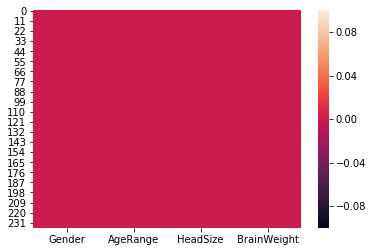

In [7]:
sns.heatmap(df.isnull())

we can see dataset doesnt contain null values

In [8]:
#describe
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [9]:
#check corr
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')



,Gender,AgeRange,HeadSize,BrainWeight
Gender,1,-0.0886521,-0.51405,-0.465266
AgeRange,-0.0886521,1,-0.105428,-0.169438
HeadSize,-0.51405,-0.105428,1,0.79957
BrainWeight,-0.465266,-0.169438,0.79957,1


In [10]:
#lets analize the dataset and target value
df['BrainWeight'].head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [11]:
df['Gender'].value_counts()

1    134
2    103
Name: Gender, dtype: int64

In [12]:
df['AgeRange'].value_counts()

2    127
1    110
Name: AgeRange, dtype: int64

In [13]:
#lets check wheteher any outlier present or not
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(237, 4)
(236, 4)


### EDA

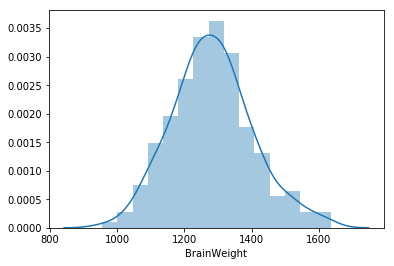

In [14]:
sns.distplot(df['BrainWeight'])



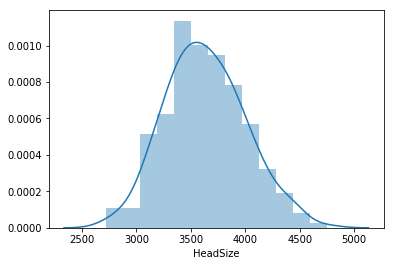

In [15]:
sns.distplot(df['HeadSize'])



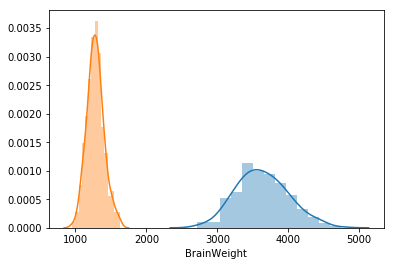

In [16]:
sns.distplot(df['HeadSize'])
sns.distplot(df['BrainWeight'])





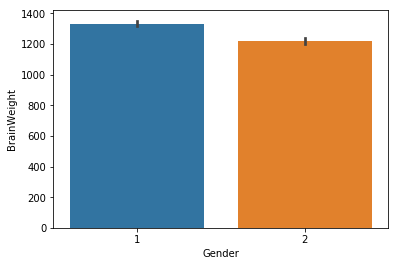

In [17]:
sns.barplot(y='BrainWeight',x='Gender',data=df)

we can see gender category 1 brainweight more than category 2 

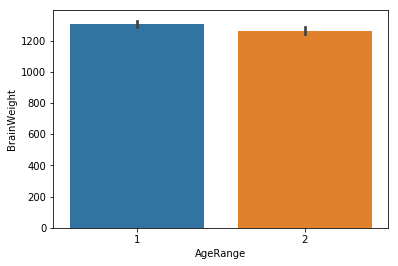

In [18]:
sns.barplot(y='BrainWeight',x='AgeRange',data=df)

we can see AgeRange category 1 brainweight more than category 2 

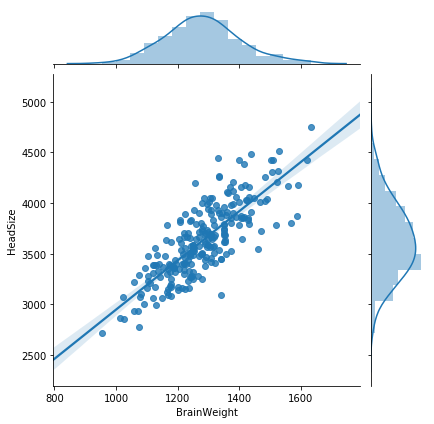

In [19]:
sns.jointplot("BrainWeight", "HeadSize", data=df, kind='reg');

In [20]:
#lets split the model
x=df.drop(['BrainWeight'],axis=1)
y=df['BrainWeight']

In [21]:
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [22]:
#shape
x.shape,y.shape

((237, 3), (237,))

In [23]:
#check the skewness
df.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

### Build the model 

In [24]:
#scaling down using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  50  is  0.78694095446796
DecisionTreeRegressor() max r2 score corresponding to  79  is  0.6166075308032981
RandomForestRegressor() max r2 score corresponding to  50  is  0.6863854055683652
KNeighborsRegressor() max r2 score corresponding to  50  is  0.709012044057102


In [36]:
#lets apply cross val_score
from sklearn.model_selection import cross_val_score
cross_val_score(regr,x,y,cv=5,scoring='r2').mean()

0.5055914843895681

the Below cross validation score is less and it shows that we further need to improve our model using more data

In [37]:
from sklearn.linear_model import Lasso,Ridge
ls = Lasso(alpha=0.01)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.6366912933317068

In [38]:
#since maximum r2 score is comming around random state 50 we will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [39]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.78694095446796
RMSE is :  57.89046127064031


In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
189,1350,1276.082571
16,1358,1272.293478
233,1215,1202.385325
20,1357,1363.162898
211,1320,1246.746774


In [31]:
#save the model
from joblib import dump, load
dump(lr, 'headsize.joblib') 

['headsize.joblib']

In [ ]:
#Lets save the model using joblib
from sklearn.externals import joblib 
# Save the model as a pickle in a file 
joblib.dump(lr, 'lr_headbrain.pkl')